In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2

import pandas as pd





In [24]:
from matplotlib import rc
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
rc('font', **font)

In [25]:
def plot_residuals(x, y, y_fit, y_unc, xlabel="", ylabel="Residuals", save_as=""):
    residuals = y - y_fit
    plt.errorbar(x, residuals, yerr=y_unc, fmt='o', ecolor='lightgray', elinewidth=2, capsize=1)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if save_as:
        plt.savefig(plotpath / save_as, bbox_inches="tight")
    plt.show()

def calculate_chi2(y, y_fit, y_unc, k):
    """
    Calculate the chi-squared statistic, reduced chi-squared, and chi-squared probability.
    Parameters:
    y (array-like): Observed data points.
    y_fit (array-like): Fitted data points.
    y_unc (array-like): Uncertainties in the observed data points.
    k (int): Number of fitted parameters.
    Returns:
    tuple: A tuple containing:
        - chi (float): The chi-squared statistic.
        - reduced_chi2 (float): The reduced chi-squared statistic.
        - chi2_prob (float): The probability of obtaining a chi-squared value at least as extreme as the one computed, given the degrees of freedom.
    """

    chi = np.sum(((y - y_fit) / y_unc) ** 2)
    dof = len(y) - k
    reduced_chi2 = chi / dof
    chi2_prob = 1 - chi2.cdf(chi, dof)
    return chi, reduced_chi2, chi2_prob

In [26]:
def format_parameters_with_errors(parameters, errors):
    def round_to_significant_figures(x, sig_figs=1):
        if x == 0:
            return 0
        else:
            return round(x, sig_figs - int(np.floor(np.log10(abs(x)))) - 1)

    formatted_values = []
    for param, err in zip(parameters, errors):
        # Round error to one significant figure
        rounded_err = round_to_significant_figures(err, sig_figs=1)
        # Adjust parameter value to match error precision
        param_precision = int(np.floor(np.log10(rounded_err)))
        rounded_param = round(param, -param_precision)
        
        formatted_values.append(f"{rounded_param} ± {rounded_err}")

    return formatted_values

## Uncertainties 
Reference: [Keysight FAQs for Uncertainty](https://docs.keysight.com/kkbopen/understanding-voltage-measurement-accuracy-for-infiniivision-oscilloscopes-584425356.html#:~:text=and%20Infiniium%20oscilloscopes.-,DC%20vertical%20offset%20accuracy,up%20and%20down%20the%20screen.)
- Vertical scale was 50V/div (? not fully sure but makes sense) with 8 divisions (ranged from -2V to 2V) 
- No vertical offset
Uncertainty in voltage readings given by single-cursor accuracy
- Different than RSS (Root Mean Square), we sum errors from sources linearly instead of in quadrature 


In [27]:
from utils import meterman37xr_unc

batteryV = "1.54"
meterman37xr_unc(batteryV)

0.05154

In [28]:

# Load the Excel file into a DataFrame
# 'your_file.xlsx' should be the path to your Excel file
df = pd.read_excel('data/Q_oscillator_data.xlsx')

# To read a specific sheet by name:
df = pd.read_excel('data/Q_oscillator_data.xlsx', sheet_name='Ex1')

# To read a specific sheet by index (0 for the first sheet):
# df = pd.read_excel('your_file.xlsx', sheet_name=0)

# Print the first few rows of the DataFrame
#print(df.head())

#print(df.loc[2])

# Access a specific column
column_data = df['Sin Frequency (KHz)']
print(column_data.head(29))

# Access a specific cell (e.g., row 0, column 'ColumnName')
#cell_value = df.loc[0, ]
#print(cell_value)
#

values_list = column_data.tolist()    # returns a list of values
#values_tuple = tuple(row) 

column_data1 = df['V_r / v_in']
print(column_data1.head(29))

column_data2 = df['Output  Voltage (V)']
values_list2 = column_data2.tolist()  

# Access a specific cell (e.g., row 0, column 'ColumnName')
#cell_value = df.loc[0, ]
#print(cell_value)
#

values_list1 = column_data1.tolist()   

print(values_list)

print(values_list1)

0     0.4004
1     0.8003
2     1.1979
3     1.5993
4     2.0010
5     2.3990
6     2.7990
7     3.2000
8     3.5990
9     4.0000
10    4.4040
11    4.7500
12    4.7730
13    4.8060
14    4.8260
15    4.8490
16    4.8750
17    4.9000
18    4.9250
19    4.9500
20    4.9740
21    5.0000
22    5.2030
23    5.6060
24    6.0000
Name: Sin Frequency (KHz), dtype: float64
0     0.026775
1     0.054588
2     0.084086
3     0.117864
4     0.156851
5     0.203504
6     0.261646
7     0.336448
8     0.434465
9     0.565935
10    0.710062
11    0.799135
12    0.801250
13    0.801923
14    0.801878
15    0.802152
16    0.806999
17    0.812489
18    0.812123
19    0.811500
20    0.810296
21    0.808491
22    0.777165
23    0.771245
24    0.575278
Name: V_r / v_in, dtype: float64
[0.4004, 0.8003, 1.1979, 1.5993, 2.001, 2.399, 2.799, 3.2, 3.599, 4.0, 4.404, 4.75, 4.773, 4.806, 4.826, 4.849, 4.875, 4.9, 4.925, 4.95, 4.974, 5.0, 5.203, 5.606, 6.0]
[0.026774791473586655, 0.054587581093605196, 0.0840861709

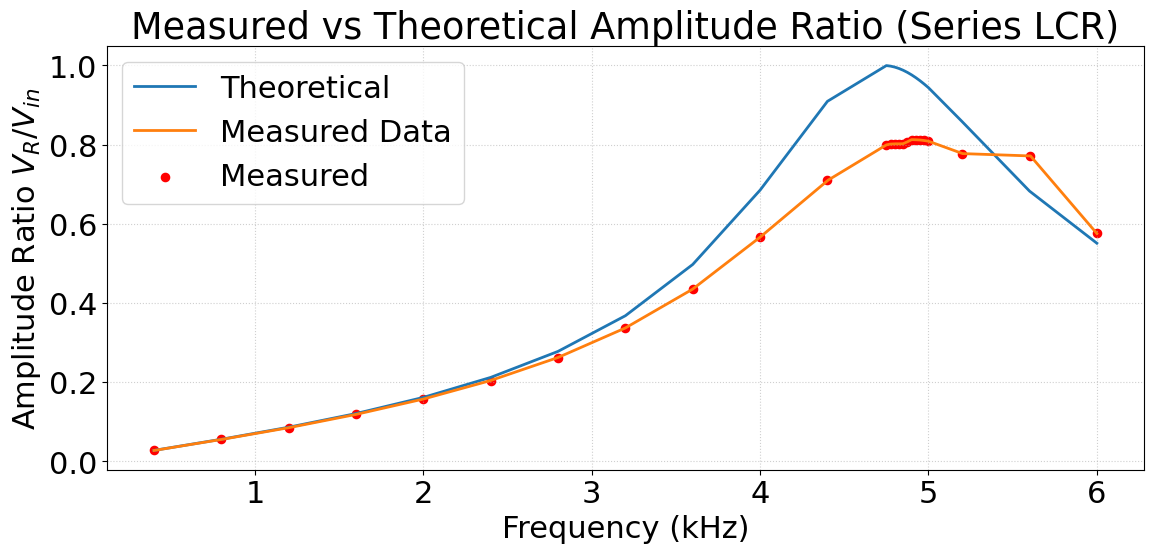

In [29]:





# onstants
L = 114.0e-3  # H
R = 1.073e3   # ohm
C = 9.93e-9   # F
Vin = 4.316   # V

# User's measured data
measured = np.array([4.316,4.316,4.317,4.316,4.313,4.309,4.302,4.291,4.271,4.239,
                     4.194,4.162,4.161,4.160,4.159,4.158,4.158,4.1571,4.1575,4.1565,
                     4.1570,4.1575,4.169,4.201,4.231])

# Frequency list (MHz → kHz → Hz)
freq_MHz = np.array([0.4,0.8,1.2,1.6,2,2.4,2.8,3.2,3.6,4,4.4,4.75,4.775,4.8,4.825,
                     4.85,4.875,4.9,4.925,4.95,4.975,5,5.2,5.6,6])
freq_Hz = freq_MHz * 1000  # convert kHz to Hz

# Measured amplitude ratio
#measured_ratio = measured / Vin

# Theoretical amplitude ratio
omega = 2 * np.pi * freq_Hz
H_theoretical = R / np.sqrt(R**2 + (omega * L - 1/(omega * C))**2)

# Create comparison dataframe
df = pd.DataFrame({
    "Freq_kHz": freq_MHz,
    "V_measured_V": values_list2,
    "Measured_Ratio_ch1/Vin": np.round(values_list1, 6),
    "Theoretical_Ratio": np.round(H_theoretical, 6)
})

# Save CSV
#outfile = "/mnt/data/theoretical_vs_measured_ratio_exact_freq.csv"
#df.to_csv(outfile, index=False)


plt.figure(figsize=(12,6))
plt.plot(freq_MHz, H_theoretical, label="Theoretical", linewidth=2)
plt.plot(values_list, values_list1,label="Measured Data", linewidth=2)
#plt.show()
plt.scatter(freq_MHz, values_list1, color="red", s=35, label="Measured")
plt.xlabel("Frequency (kHz)")
plt.ylabel("Amplitude Ratio $V_R/V_{in}$")
plt.title("Measured vs Theoretical Amplitude Ratio (Series LCR)")
plt.legend()
plt.grid(True, ls=":", alpha=0.6)
plt.tight_layout()

#plot_path = "/mnt/data/measured_vs_theoretical_plot.png"
#plt.savefig(plot_path, dpi=150)
plt.show()

#df.head(10), outfile, plot_path


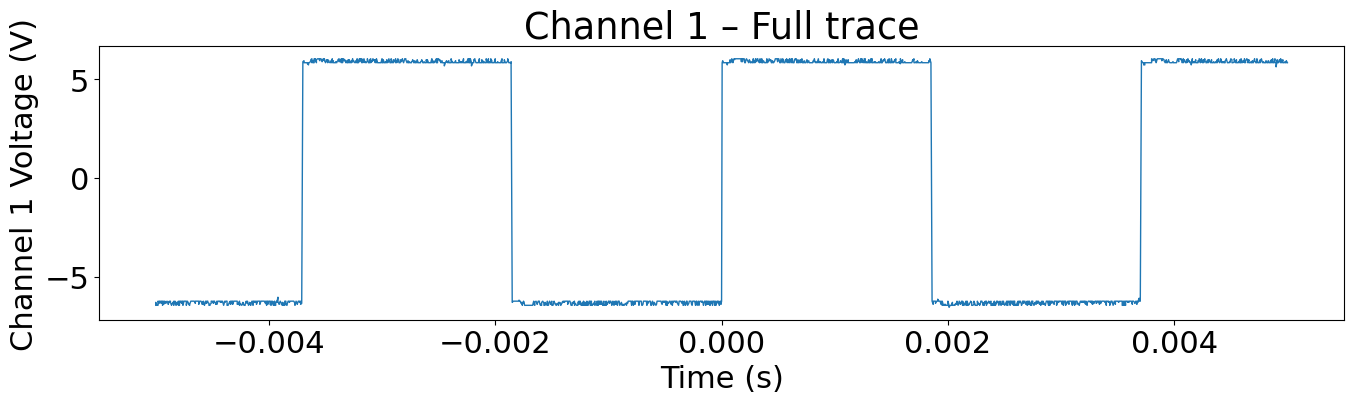

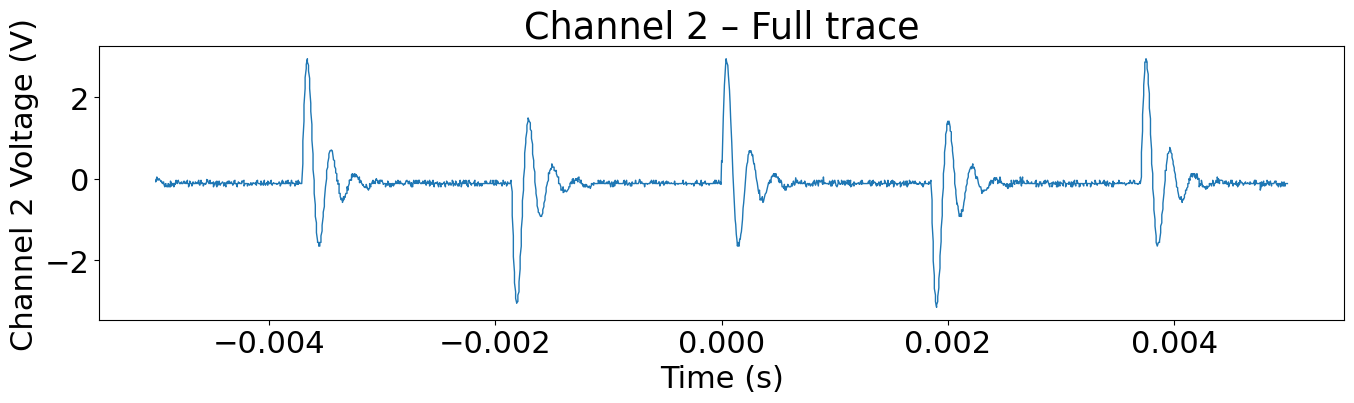

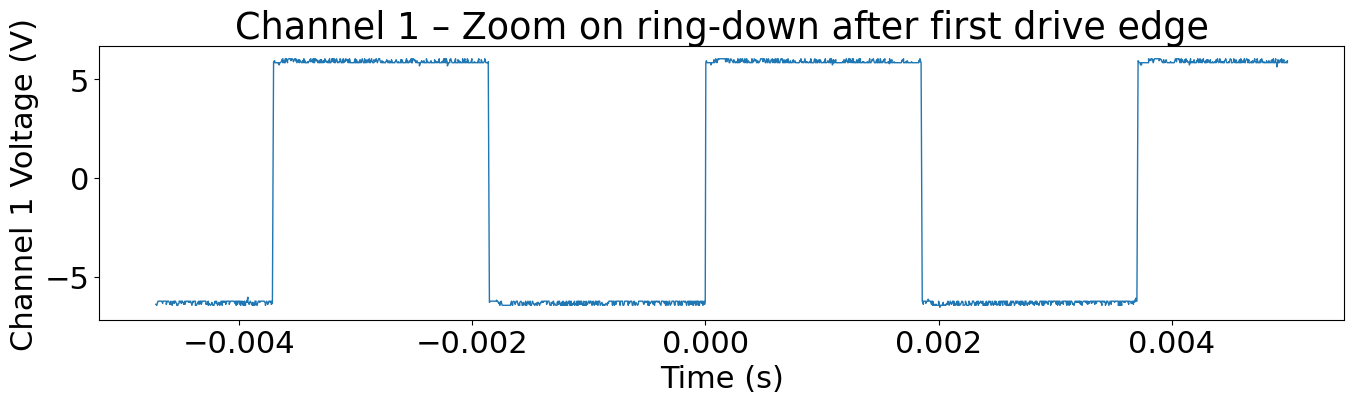

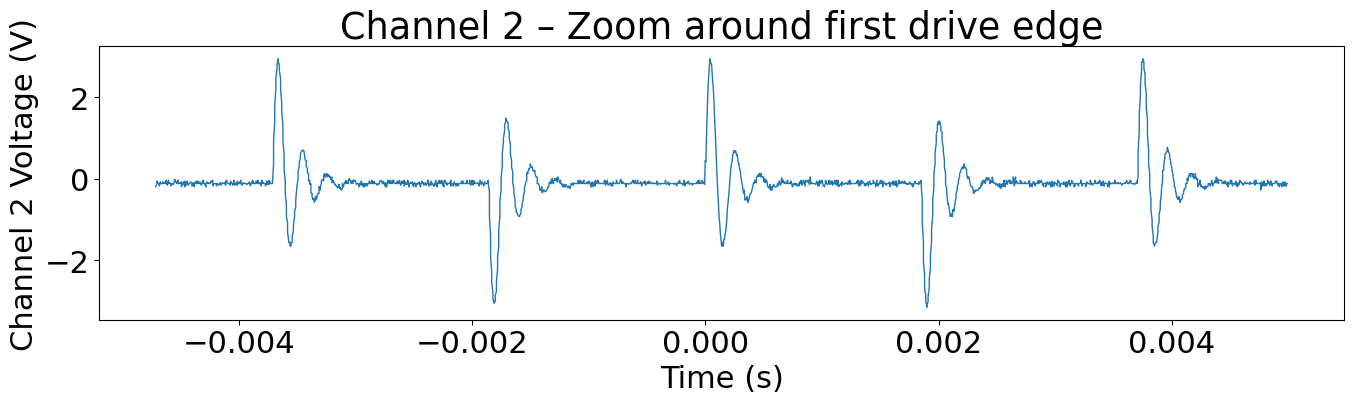

In [ ]:


# --- 1) Load & coerce numeric data (skip the units row) ---
# Your file has a units row right after the header; we keep the header but drop row 0.
df = pd.read_csv('data/scope_0.csv', dtype=str)
df = df.rename(columns=lambda c: c.strip())

data = df.iloc[1:].apply(pd.to_numeric, errors='coerce')  # coerce sci-notation strings like '+4.31E-02'
t   = data['x-axis'].to_numpy()
ch1 = data['1'].to_numpy()   # your "Measured" channel in the screenshot
ch2 = data['2'].to_numpy()   # your other scope channel (often the drive)

# Optional: strip DC offsets for visual clarity
ch1_dc = ch1 - np.nanmean(ch1)
ch2_dc = ch2 - np.nanmean(ch2)

# --- 2) Plot each channel individually (full record) ---
plt.figure(figsize=(14,4.5))
plt.plot(t, ch1, linewidth=1)
plt.xlabel("Time (s)")
plt.ylabel("Channel 1 Voltage (V)")
plt.title("Channel 1 – Full trace")
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,4.5))
plt.plot(t, ch2, linewidth=1)
plt.xlabel("Time (s)")
plt.ylabel("Channel 2 Voltage (V)")
plt.title("Channel 2 – Full trace")
plt.tight_layout()
plt.show()

# --- 3) Zoom around the first rising edge in CH2 to see ring-down on CH1 ---
# We’ll detect a rising edge on CH2 using a simple derivative threshold.
# (This assumes CH2 is the square-wave drive; if not, you can swap channels.)
d2 = np.diff(ch2_dc)
# Use an adaptive threshold: several standard deviations of the derivative
thr = 3*np.nanstd(d2)
edge_idx_candidates = np.where(d2 > thr)[0]

if edge_idx_candidates.size > 0:
    i0 = edge_idx_candidates[0]           # first detected rising edge
    # choose a zoom window around that edge (t0- a little before, to t0 + some ms)
    pre  = 200   # samples before edge to include
    post = 2000  # samples after edge to include (adjust if needed)
    a = max(0, i0 - pre)
    b = min(len(t)-1, i0 + post)

    plt.figure(figsize=(14,4.5))
    plt.plot(t[a:b], ch1[a:b], linewidth=1)
    plt.xlabel("Time (s)")
    plt.ylabel("Channel 1 Voltage (V)")
    plt.title("Channel 1 – Zoom on ring-down after first drive edge")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14,4.5))
    plt.plot(t[a:b], ch2[a:b], linewidth=1)
    plt.xlabel("Time (s)")
    plt.ylabel("Channel 2 Voltage (V)")
    plt.title("Channel 2 – Zoom around first drive edge")
    plt.tight_layout()
    plt.show()
else:
    print("No clear rising edge detected on Channel 2. Try lowering 'thr' or swap channels for edge detection.")

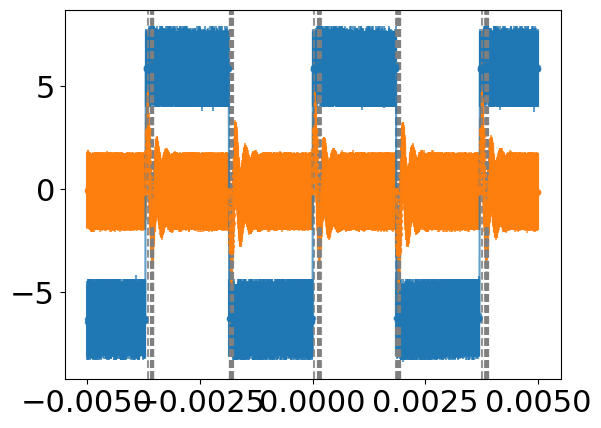

In [ ]:
from utils import keysight_unc

v_div = 0.5 # 500mV/div 
vu = keysight_unc(v_div) * np.ones(t.shape)
vu[0]

indices = np.where((ch2 > 2.9) | (ch2 < -1.0))[0]
indices = np.append(indices, len(ch1) - 1)
t[indices]

ch1ch = np.mean(ch1[(indices[1] - 21):(indices[1] - 1)])
ch2ch = np.mean(ch2[(indices[1] - 21):(indices[1] - 1)])

ch2h = np.mean(ch1[indices[0]:indices[1]] + ch2[indices[0]:indices[1]])
ch2h, ch1ch, ch2ch

plt.errorbar(t, ch1, label=r"$V_R$", yerr=vu, marker='.', alpha=0.7)
plt.errorbar(t, ch2, label=r"$V_C$", yerr=vu, marker='.', alpha=0.7)

for idx in indices[:-1]:
    plt.axvline(x=t[idx], color='gray', linestyle='--', alpha=0.85)



=== Weighted Fit (re-parameterized) ===
A      = 1.1376 V ± 0.0292
phi    = -1.9800 rad ± 0.0222
tau    = 0.167 ms ± 0.00554
omega  = 30235.4 rad/s  (f = 4812.1 Hz) ± 26.1 Hz
C      = 0.0111 V ± 0.003
Q      = 2.52 ± 0.09
sigma_scope = 0.01876 V, sigma_noise = 0.04549 V, sigma_total = 0.04921 V
chi² = 239.30,  dof = 275,  reduced chi² = 0.87


/var/folders/jg/px618sws2hddxn4fn7zlrl6r0000gn/T/ipykernel_14544/4269961055.py:160: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


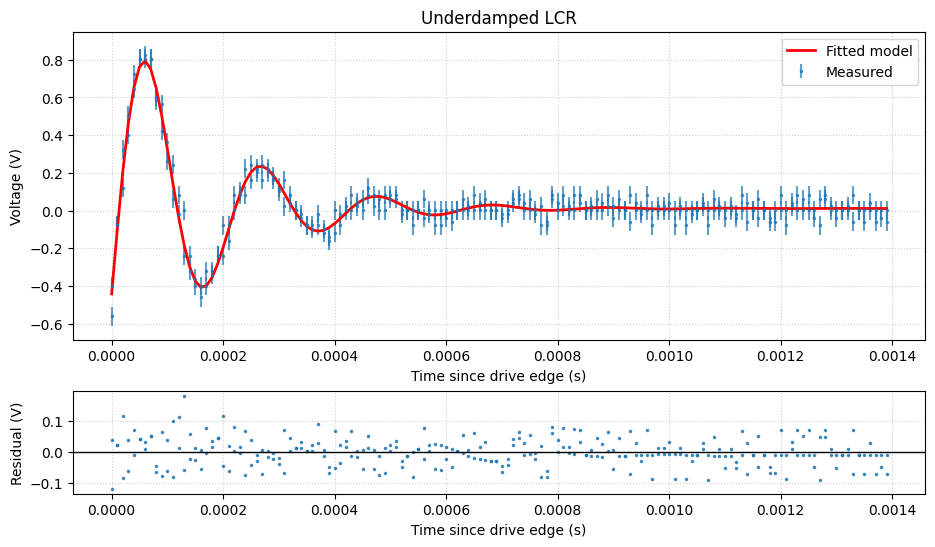

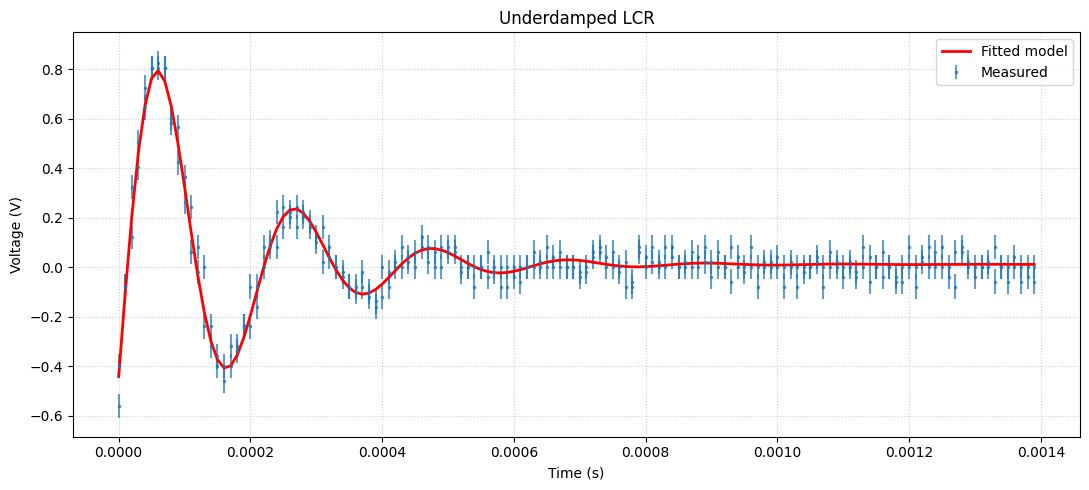

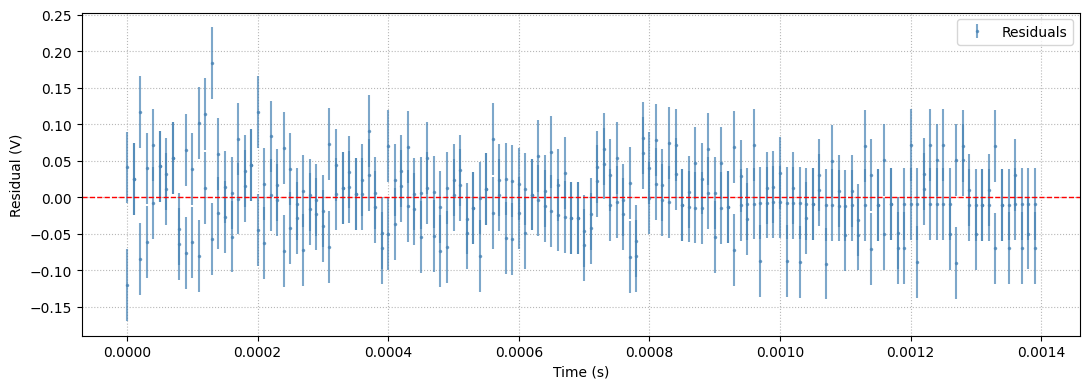

In [12]:
# ============================
# Better Underdamped LCR Fit
# ============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy.optimize import curve_fit

from utils import keysight_unc  # <-- keep your function

# ---- 1) Load data ----
df = pd.read_csv('data/scope_0.csv', dtype=str)
df = df.rename(columns=lambda c: c.strip())
data = df.iloc[1:].apply(pd.to_numeric, errors='coerce')

t   = data['x-axis'].to_numpy()
ch1 = data['1'].to_numpy()   # drive (square wave)
ch2 = data['2'].to_numpy()   # response (oscillation)

# ---- 2) Find first rising edge (as you did) ----
d1  = np.diff(ch1 - np.nanmean(ch1))
thr = 3 * np.nanstd(d1)
edge_idx = np.where(d1 > thr)[0]
if edge_idx.size == 0:
    raise RuntimeError("No rising edge found on the drive channel.")
i0 = edge_idx[0]

# ---- 3) Window: skip early-edge distortion, fit the clean tail ----
fs       = 1.0 / np.median(np.diff(t))      # sampling rate (Hz)
t_skip   = 0.00020                          # 0.20 ms after the edge (adjust 0.15–0.30 ms if needed)
posttime = 0.00160                          # total length of the fit window after the edge

a = int(i0 + t_skip*fs)
b = int(i0 + posttime*fs)
a = max(a, 0); b = min(b, len(t))

tt = t[a:b] - t[a]                          # time starts at 0 in window
yy = ch2[a:b].copy()                        # raw response in window

# ---- 4) Remove small baseline (mean of last quiet part) ----
tail = slice(max(0, len(yy) - 250), max(10, len(yy) - 20))  # quiet region near end
baseline = np.mean(yy[tail])
yy -= baseline

# ---- 5) Initial guesses from FFT + Hilbert envelope ----
# Frequency guess
Y  = np.fft.rfft(yy)
f  = np.fft.rfftfreq(len(yy), d=1/fs)
idxpk = 1 + np.argmax(np.abs(Y[1:]))       # ignore DC
f0   = float(f[idxpk]) if np.isfinite(f[idxpk]) else 5_000.0
w0   = 2*np.pi*f0

# Tau guess from envelope slope
z   = hilbert(yy)
E   = np.abs(z)
# Avoid log(0)
Eh  = np.clip(E, 1e-9, None)
m, b_lin = np.polyfit(tt, np.log(Eh), 1)
tau0 = max(5e-4, min(0.5, abs(-1.0/m)))     # clamp to 0.5 ms – 0.5 s

# Amplitude-ish guess
A0  = 0.5*(np.max(yy) - np.min(yy))
# Reparameterize: y = exp(-t/tau)[B cos wt + D sin wt] + C
B0, D0, C0 = A0, 0.0, 0.0

# ---- 6) Build realistic uncertainties (Keysight + noise) for this window ----
# IMPORTANT: set your vertical scale in the UNITS expected by keysight_unc.
# Example: if your scope was at 500 mV/div and keysight_unc expects V/div:
v_div = 0.5       # V/div   (if your function expects mV/div, use v_div = 500)
sigma_scope = float(keysight_unc(v_div)) / 10.0
 # scalar

# after getting y_fit:
residuals = yy - y_fit

# Option 1: residual-based SD (simple)
sigma_noise = float(np.std(residuals))  # random part measured from the quiet tail
sigma_win = float(np.hypot(sigma_scope, sigma_noise))
vu_win = np.full_like(tt, sigma_win)
# refit with curve_fit(..., sigma=vu_win, absolute_sigma=True)


# ---- 7) Re-parameterized model + tight bounds ----
def model_BD(t, B, D, tau, omega, C):
    return np.exp(-t/tau)*(B*np.cos(omega*t) + D*np.sin(omega*t)) + C

# Keep bounds informed by our guesses (prevents wandering solutions)
low  = [-5*A0, -5*A0, 0.3*tau0, 2*np.pi*0.7*f0, -2.0]
high = [ 5*A0,  5*A0, 3.0*tau0, 2*np.pi*1.4*f0,  2.0]
p0   = [B0, D0, tau0, w0, C0]

# ---- 8) Weighted fit with absolute σ ----
params, cov = curve_fit(
    model_BD, tt, yy, p0=p0, bounds=(low, high),
    sigma=vu_win, absolute_sigma=True, maxfev=80000
)
B, D, tau, omega, C = params
perr = np.sqrt(np.diag(cov))

# Convert back to A and phi
A   = np.hypot(B, D)
phi = np.arctan2(-D, B)

fd  = omega/(2*np.pi)
Q   = (omega * tau) / 2

# Uncertainty propagation for A and phi
# (approximate, from covariance of [B, D])
varA  = (B/A)**2 * cov[0,0] + (D/A)**2 * cov[1,1] + 2*(B*D/A**2)*cov[0,1]
Aerr  = np.sqrt(max(varA, 0.0))
# phi = atan2(-D, B) → dphi = sqrt( (∂φ/∂B)^2 Var(B) + (∂φ/∂D)^2 Var(D) + 2 ∂φ/∂B ∂φ/∂D Cov(B,D) )
dphi_dB =  D / (A**2)
dphi_dD =  B / (A**2)
varphi  = dphi_dB**2*cov[0,0] + dphi_dD**2*cov[1,1] + 2*dphi_dB*dphi_dD*cov[0,1]
phierr  = np.sqrt(max(varphi, 0.0))

# Propagate to Q: Q = (omega*tau)/2
Qerr = 0.5*np.sqrt( (tau**2)*cov[3,3] + (omega**2)*cov[2,2] + 2*tau*omega*cov[2,3] )

# ---- 9) Goodness-of-fit (χ² and reduced χ²) ----
y_fit = model_BD(tt, *params)
res   = (yy - y_fit) / sigma_win
chi2  = np.sum(res**2)
dof   = len(yy) - len(params)
chi2r = chi2 / dof

# ---- 10) Report ----
print("\n=== Weighted Fit (re-parameterized) ===")
print(f"A      = {A:.4f} V ± {Aerr:.3g}")
print(f"phi    = {phi:.4f} rad ± {phierr:.3g}")
print(f"tau    = {tau*1e3:.3f} ms ± {perr[2]*1e3:.3g}")
print(f"omega  = {omega:.1f} rad/s  (f = {fd:.1f} Hz) ± {(perr[3]/(2*np.pi)):.1f} Hz")
print(f"C      = {C:.4f} V ± {perr[4]:.3g}")
print(f"Q      = {Q:.2f} ± {Qerr:.2f}")
print(f"sigma_scope = {sigma_scope:.4g} V, sigma_noise = {sigma_noise:.4g} V, sigma_total = {sigma_win:.4g} V")
print(f"chi² = {chi2:.2f},  dof = {dof},  reduced chi² = {chi2r:.2f}")

# ---- 11) Plot: data, fit, and residuals ----
fig = plt.figure(figsize=(11,6))
gs  = fig.add_gridspec(2, 1, height_ratios=[3, 1], hspace=0.25)

ax = fig.add_subplot(gs[0,0])
ax.errorbar(tt, yy, yerr=vu_win, fmt='.', ms=3, alpha=0.7, label='Measured')
ax.plot(tt, y_fit, 'r-', lw=2, label='Fitted model')
ax.set_xlabel("Time since drive edge (s)")
ax.set_ylabel("Voltage (V)")
ax.set_title("Underdamped LCR")
ax.legend()
ax.grid(True, ls=':', alpha=0.6)

ax2 = fig.add_subplot(gs[1,0], sharex=ax)
ax2.plot(tt, (yy - y_fit), '.', ms=3, alpha=0.8)
ax2.axhline(0, color='k', lw=1)
ax2.set_ylabel("Residual (V)")
ax2.set_xlabel("Time since drive edge (s)")
ax2.grid(True, ls=':', alpha=0.6)

plt.tight_layout()
plt.show()

# ---------- Plot 1: Data + Fit ----------
plt.figure(figsize=(11,5))
plt.errorbar(tt, yy, yerr=vu_win, fmt='.', ms=3, alpha=0.7, label='Measured')
plt.plot(tt, y_fit, 'r-', lw=2, label='Fitted model')
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Underdamped LCR")
plt.legend()
plt.grid(True, ls=':', alpha=0.6)
plt.tight_layout()
plt.show()

# ---------- Plot 2: Residuals (separate figure, WITH error bars) ----------
residuals = yy - y_fit

plt.figure(figsize=(11,4))
plt.errorbar(tt, residuals, yerr=vu_win, fmt='.', ms=3, alpha=0.7, color='steelblue', label='Residuals')
plt.axhline(0, color='red', lw=1, linestyle='--')
plt.xlabel("Time (s)")
plt.ylabel("Residual (V)")

plt.grid(True, ls=':', alpha=0.9)
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
from utils import meterman37xr_unc

# constants
L = 114.0e-3  # H
R = 1.073e3   # ohm
C = 9.93e-9   # F
Vin = 4.316   # V

inductor_unc = meterman37xr_unc("114.0", "I")
resistor_unc = meterman37xr_unc("1073", "R")
capacitor_unc = meterman37xr_unc("9.93", "C")
battery_unc = meterman37xr_unc("4.316", "V")

# User's measured data
measured = np.array([4.316,4.316,4.317,4.316,4.313,4.309,4.302,4.291,4.271,4.239,
                     4.194,4.162,4.161,4.160,4.159,4.158,4.158,4.1571,4.1575,4.1565,
                     4.1570,4.1575,4.169,4.201,4.231])

# Frequency list (MHz → kHz → Hz)
freq_MHz = np.array([0.4,0.8,1.2,1.6,2,2.4,2.8,3.2,3.6,4,4.4,4.75,4.775,4.8,4.825,
                     4.85,4.875,4.9,4.925,4.95,4.975,5,5.2,5.6,6])
freq_Hz = freq_MHz * 1000  # convert kHz to Hz

# Measured amplitude ratio
#measured_ratio = measured / Vin

# Theoretical amplitude ratio
omega = 2 * np.pi * freq_Hz
H_theoretical = R / np.sqrt(R**2 + (omega * L - 1/(omega * C))**2)

# Create comparison dataframe
df = pd.DataFrame({
    "Freq_kHz": freq_MHz,
    "V_measured_V": values_list2,
    "Measured_Ratio_ch1/Vin": np.round(values_list1, 6),
    "Theoretical_Ratio": np.round(H_theoretical, 6)
})

# Save CSV
#outfile = "/mnt/data/theoretical_vs_measured_ratio_exact_freq.csv"
#df.to_csv(outfile, index=False)


plt.figure(figsize=(12,6))
plt.plot(freq_MHz, H_theoretical, label="Theoretical", linewidth=2)
plt.plot(values_list, values_list1,label="Measured Data", linewidth=2)
#plt.show()
plt.scatter(freq_MHz, values_list1, color="red", s=35, label="Measured")
plt.xlabel("Frequency (kHz)")
plt.ylabel("Amplitude Ratio $V_R/V_{in}$")
plt.title("Measured vs Theoretical Amplitude Ratio (Series LCR)")
plt.legend()
plt.grid(True, ls=":", alpha=0.6)
plt.tight_layout()

#plot_path = "/mnt/data/measured_vs_theoretical_plot.png"
#plt.savefig(plot_path, dpi=150)
plt.show()

#df.head(10), outfile, plot_path